In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results__.html
/kaggle/input/stock-market-analysis-prediction-using-lstm/__resultx__.html
/kaggle/input/stock-market-analysis-prediction-using-lstm/__notebook__.ipynb
/kaggle/input/stock-market-analysis-prediction-using-lstm/__output__.json
/kaggle/input/stock-market-analysis-prediction-using-lstm/custom.css
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___40_0.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___31_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___14_0.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___28_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results___33_1.png
/kaggle/input/stock-market-analysis-prediction-using-lstm/__results___files/__results__

# Stock Price Prediction 
Stock market is a place where buying and selling of share happen for public listed companies. Stock exchange is the mediator that allows buing and selling share.

Stock Market Prediction helps you determine the future value of company stock and other finacial instruments traded on an exchange.


**Why is it importantance ?**

* Helps companies to raise capital 
* Helps crate personal wealth 
* Serves as an indicator of the state of the economy 
* Helps to increase investment 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data = pd.read_csv("/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


**Noted**: In a stock dataset, the columns typically represent variouse attributes or features related to the stocks being analyzed.

1. **Data**: represent the date or time stamp of the data point, indicating when the data was recored. 

2. **Open**: The opeining price of the stock at the begining of the trading day.

3. **High**: The highest price at which the stock traded during trading day. 

4. **Low**: The lowest price at which the stock traded during the trading day.

5. **Close**: The closing price of the stock at the end of the trading day.

6. **Volumns** The total number of shared traded during the trading day.

7. **Adjusted Close**: The closing price of the stock adjusted for any corporate actions, such as stock splites or divideds.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

print(f"DataFrame contains stock prices between {data['Date'].min()} and {data['Date'].max()}\n\n")
print(f"Total days = {data['Date'].max() - data['Date'].min()}")

DataFrame contains stock prices between 2010-06-29 00:00:00 and 2017-03-17 00:00:00


Total days = 2453 days 00:00:00


In [9]:
data.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


**Noted**: Box plot are commonly used in data analysis and visualize the distribution of data, identify outliers, compare multiple distribution, assese skewness and handle large datasets efficiently, 

In stock analysis, box plots help understand price variability, detect outliers, and compare trading behavior across different stocks or market indices.



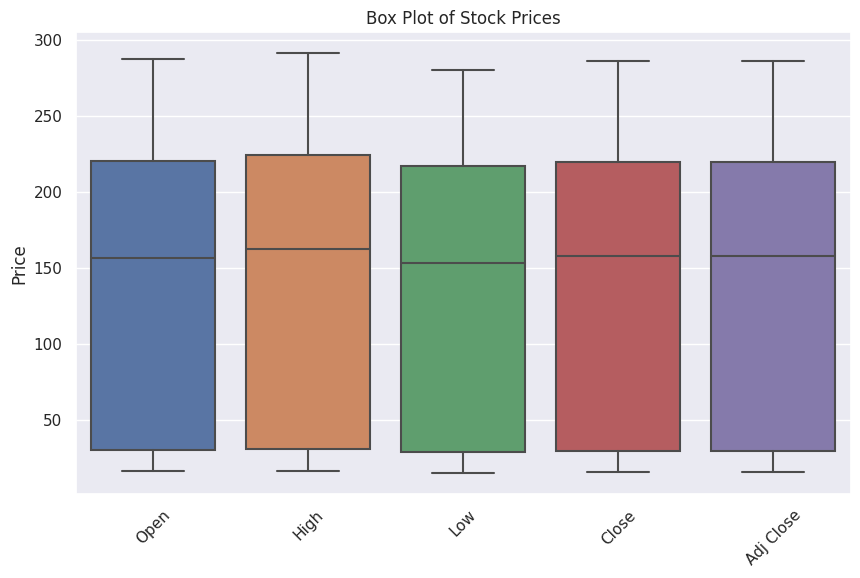

In [10]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data[['Open', 'High', 'Low', 'Close', 'Adj Close']], orient = 'v')
plt.title("Box Plot of Stock Prices")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

In [11]:
import plotly.graph_objects as go


data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(title='Stock Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

# Feature Selection

**Noted**: 
The "Close" and "Adj Close" prices are preferred targets in stock prediction due to their relevance, reflecting daily trading activity and investor sentiment, liquidity, accessibility in financial databases, and consistency, especially with adjustments for corporate actions.

In [12]:
feature = data.drop(columns = ['Close', 'Adj Close'])
target = data['Close']

# Linear Regression

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [14]:
print("X_train shape", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape ", y_train.shape)
print("y_test shape ", y_test.shape)
print(X_train)

X_train shape (1353, 4)
X_test shape:  (339, 4)
y_train shape  (1353,)
y_test shape  (339,)
                  Open        High         Low    Volume
Date                                                    
2013-10-01  193.960007  194.229996  188.369995   7755900
2014-01-23  177.229996  182.380005  173.419998   7867400
2012-02-09   32.000000   32.900002   31.430000   1277100
2016-01-20  199.399994  201.279999  191.250000   5838600
2015-10-21  211.990005  214.809998  208.800003   4151500
...                ...         ...         ...       ...
2014-12-23  223.809998  224.320007  219.520004   4505700
2015-08-19  260.329987  260.649994  255.020004   3596200
2013-11-26  119.379997  122.720001  116.099998  13885500
2016-04-15  251.309998  254.600006  249.119995   3752400
2014-12-17  193.059998  206.649994  192.649994   7367800

[1353 rows x 4 columns]


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error

y_pred = model.predict(X_test)

mse_value = mse(y_pred, y_test)

print("Mean Squared Error: ", mse_value)

Mean Squared Error:  2.004838648668096


In [18]:
import plotly.graph_objects as go

#convert date tume to numerical value
x_value = X_train.index.astype(np.int64) // 10**9

y_pred = model.predict(X_train)

fig1 = go.Scatter(
        x = X_train.index,
        y = y_train,
        mode = 'markers',
        name = 'Actual')

slop, intercept = np.polyfit(x_value, y_train, 1)
best_fit_line = slop * x_value + intercept

fig2 = go.Scatter(
        x = X_train.index,
        y = best_fit_line,
        mode = 'lines',
        name = 'Best fit line')

layout = go.Layout(
        xaxis = dict(title  = 'Day'),
        yaxis = dict(title = 'Stock Price'),
        title = 'Actual vs Predict Stock Prices with Best fit line')

plot2 = go.Figure(data = [fig1, fig2], layout = layout)
plot2.show()

**Noted**
In general, we don't typically use Linear Regression model to predict the price of stock market. Even thought, we knew that the linear regression is use for predicting continouse value. 

Since Stock market price is non-stationary dataset because in stock market the relationship between variable can chnage over time, which violeting the assumption of linear regression. 

Additionally, the linear regression does not capture the complex patterns, trends, and non-linear relationship often found in finacial data. 

Therefore, it's prone to producing unreliable predictions and misleading interpretations in such volatile and non stationary contexts.

# LSTM model (Long Short Term Memory)

Long Short-Term-Memory(LSTM) is a type of recurrent neural network (RNN) designed to model sequectial data with long-range dependencies. 

LSTM model is more effectively capture and remember patterns in sequantial data. making them well-sitaed for tasks such as time series, forecasting

It is suitable for stock prediction because it can capture complex patterns, handle non-linear relationship data, retaion long -term memory, and adapt to noisy and diverse data source commonly found in stock market.

so We are goind to import tensorflow in other to implement the LSTM model

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-04-21 10:34:07.441296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 10:34:07.441433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 10:34:07.581984: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
# Step 1: Preprocessing the Data
# Load the dataset
# Assuming you have a DataFrame called 'stock_data' with a column 'Close' containing the closing prices
# Replace 'stock_data' with your actual DataFrame
# Replace 'Close' with the actual column name containing the closing prices
# Make sure the index of 'stock_data' is the date
stock_data = pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')


In [21]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

In [22]:
# Normalize the data using MinMaxSccaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(stock_data[['Close']])

In [23]:
# Split the data into training  and testing
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0: train_size, :], scaled_data[train_size: len(scaled_data), :]

In [24]:
# Define a function to create the input sequences for the LSTM model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

    

In [25]:
# Set the sequence length (number of time steps to look back)
seq_length = 50

# Create input sequences for the LSTM model
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the input data to be 3-dimensional for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [26]:
# Step 2: Build and Train the LSTM Model
# Define the LSTM model architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0824 - val_loss: 0.0057
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.8044e-04 - val_loss: 0.0023
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss:

In [28]:
# Step 3: Evaluate the Model
# Evaluate the model on the testing data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5628e-04
Test Loss: 0.0004398286691866815


In [29]:
# Step 4: Visualize the Predictions and Trends
# Generate predictions on the testing data
predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [30]:
# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

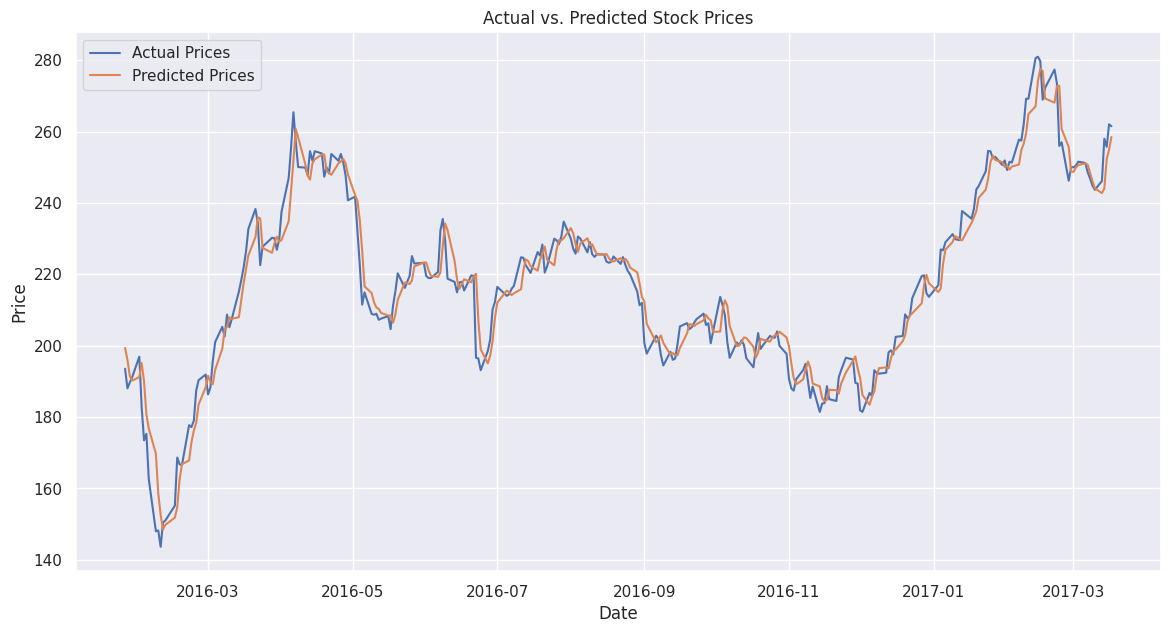

In [31]:
# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index[-len(predictions):], y_test, label='Actual Prices')
plt.plot(stock_data.index[-len(predictions):], predictions, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
# Visualize the trends captured by the LSTM model
trend_markers = []
for i in range(1, len(y_test)):
    if y_test[i] > y_test[i - 1] and predictions[i] > predictions[i - 1]:
        trend_markers.append((stock_data.index[-len(predictions) + i], y_test[i], 'green', 11, 'Captured Trend (Up)'))
    elif y_test[i] < y_test[i - 1] and predictions[i] < predictions[i - 1]:
        trend_markers.append((stock_data.index[-len(predictions) + i], y_test[i], 'red', 10, 'Captured Trend (Down)'))

# Create scatter plot to visualize trends
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index[-len(predictions):], y=y_test.flatten(), mode='markers', name='Actual Prices'))
fig.add_trace(go.Scatter(x=stock_data.index[-len(predictions):], y=predictions.flatten(), mode='lines', name='Predicted Prices'))
for marker in trend_markers:
    fig.add_trace(go.Scatter(x=[marker[0]], y=[marker[1]], mode='markers', marker=dict(color=marker[2], symbol=marker[3]), name=marker[4]))
fig.update_layout(title='Actual vs. Predicted Stock Prices with Captured Trends', xaxis_title='Date', yaxis_title='Price')
fig.show()

Studying LSTM models for stock price prediction provides valuable insights into market dynamics and aids in making informed investment decisions. By analyzing predictive power, pattern recognition, feature importance, risk assessment, and strategy evaluation, one can enhance investment strategies. To improve the model, consider refining input features, optimizing model architecture, tuning hyperparameters, and incorporating external data sources.